In [415]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from scipy.spatial.distance import cosine
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity
le = preprocessing.LabelEncoder()

In [416]:
iris_data = pd.read_csv('iris/iris.csv')

In [417]:
iris_data.columns.values
iris_data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [418]:
iris_data['class'] = le.fit_transform(iris_data['class'])

In [419]:
X = iris_data.iloc[:,[0,1,2,3,4]].values


In [420]:
Y = iris_data.iloc[:,[4]].values
Y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

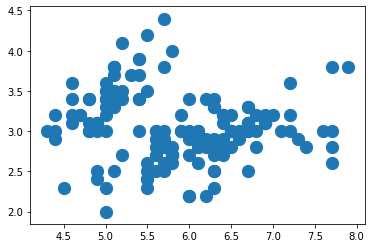

In [421]:
plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [422]:
# cosine distance 
def cosine_distance(p1, p2):
    return distance.cosine(p1,p2)

In [423]:
# Euclidean distance
def Euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [424]:
# Jaccard distance
def Jaccard_distance(point1, point2):
    num = 0
    den = 0
    for i in range(len(point1)):
        num = num + min(point1[i],point2[i])
        den = den + max(point1[i],point2[i])
    dist = 1 - num/den
    return dist

In [425]:
#K-means implementation
def KMean(data,distance):
    centroids = {}
    Euc_itr = 0
    Cos_itr = 0 
    Jacc_itr = 0
    
    # Initialising centroids K is equal to 3
    for i in range(3):
        centroids[i] = data[i][0:4]
    
    classes = {}
    target = {}
    
    for iteration in range(100):
        if(distance == Euclidean_distance):
            Euc_itr = Euc_itr + 1
        if(distance == cosine_distance):
            Cos_itr = Cos_itr + 1
        if(distance == Jaccard_distance):
            Jacc_itr = Jacc_itr + 1
    
        classes = {}
        target = {}
        label = []
        for classKey in range(3):
            classes[classKey] = []
            target[classKey] = []
    
        for dataPoint in data: 
            Distance = []
            for centroid in centroids:
                if(distance == Euclidean_distance):
                    dis = Euclidean_distance(dataPoint[0:4], centroids[centroid])
                    Distance.append(dis)
                if(distance == cosine_distance):
                    dis = cosine_distance(dataPoint[0:4], centroids[centroid])
                    Distance.append(dis)
                if(distance == Jaccard_distance):
                    dis = Jaccard_distance(dataPoint[0:4], centroids[centroid])
                    Distance.append(dis)

            minDis = min(Distance)
            minDisIndex = Distance.index(minDis)
            classes[minDisIndex].append(dataPoint[0:4])
            target[minDisIndex].append(dataPoint[4])
        
            
           
        oldCentroid = dict(centroids)
    
    # calculating new centroids
        for classKey in classes:
            classData = classes[classKey]
            NewCentroid = np.mean(classData, axis = 0)
            centroids[classKey] = NewCentroid
        isFine = True

        for centroid in oldCentroid:
            oldCent = oldCentroid[centroid]
            curr = centroids[centroid]
        if np.sum((curr - oldCent)/oldCent * 100) > 0.001:
                isFine = False

        if isFine:
            break
    
    # Calculating Accuracies
    label = {}
    correctclass = 0
    for targetKey in target:
        label[targetKey] = []
        count0 = 0
        count1 = 0
        count2 = 0
        for i in range(len(target[targetKey])):
            if(target[targetKey][i] == 1.0):
                count1 = count1+1
            if(target[targetKey][i] == 2.0):
                count2 = count2+1
            if(target[targetKey][i] == 0.0):
                count0 =count0+1
        print("Count of 0,1,2 classes in", targetKey, "cluster :" , count0,count1,count2)
        if(count0 == max(count0,count1,count2)):
            label[targetKey].append(0)
            correctclass = correctclass+ count0
        elif(count1 == max(count0,count1,count2)):
            label[targetKey].append(1)
            correctclass = correctclass+ count1
        elif(count2 == max(count0,count1,count2)):
            label[targetKey].append(2)
            correctclass = correctclass+ count2
                    
        print("Predicted class values in ",targetKey, " cluster :", target[targetKey])
    print("Labels",label)
    Accuracy =   correctclass/150 * 100;
    print("Accuracy",Accuracy)
    print("E_ITR",Euc_itr)
    print("C_ITR",Cos_itr)
    print("J_ITR",Jacc_itr)
    return centroids, classes

In [426]:
centroids, classes = KMean(X,Euclidean_distance)

Count of 0,1,2 classes in 0 cluster : 0 18 49
Predicted class values in  0  cluster : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
Count of 0,1,2 classes in 1 cluster : 0 32 1
Predicted class values in  1  cluster : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0]
Count of 0,1,2 classes in 2 cluster : 50 0 0
Predicted class values in  2  cluster : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [427]:
#Euclidean centroids
centroids,classes

({0: array([6.57014925, 2.9880597 , 5.33880597, 1.88507463]),
  1: array([5.63636364, 2.63636364, 4.02727273, 1.25151515]),
  2: array([5.006, 3.418, 1.464, 0.244])},
 {0: [array([7. , 3.2, 4.7, 1.4]),
   array([6.4, 3.2, 4.5, 1.5]),
   array([6.9, 3.1, 4.9, 1.5]),
   array([6.5, 2.8, 4.6, 1.5]),
   array([6.3, 3.3, 4.7, 1.6]),
   array([6.6, 2.9, 4.6, 1.3]),
   array([6.1, 2.9, 4.7, 1.4]),
   array([6.7, 3.1, 4.4, 1.4]),
   array([5.9, 3.2, 4.8, 1.8]),
   array([6.3, 2.5, 4.9, 1.5]),
   array([6.1, 2.8, 4.7, 1.2]),
   array([6.6, 3. , 4.4, 1.4]),
   array([6.8, 2.8, 4.8, 1.4]),
   array([6.7, 3. , 5. , 1.7]),
   array([6. , 2.7, 5.1, 1.6]),
   array([6. , 3.4, 4.5, 1.6]),
   array([6.7, 3.1, 4.7, 1.5]),
   array([6.1, 3. , 4.6, 1.4]),
   array([6.3, 3.3, 6. , 2.5]),
   array([5.8, 2.7, 5.1, 1.9]),
   array([7.1, 3. , 5.9, 2.1]),
   array([6.3, 2.9, 5.6, 1.8]),
   array([6.5, 3. , 5.8, 2.2]),
   array([7.6, 3. , 6.6, 2.1]),
   array([7.3, 2.9, 6.3, 1.8]),
   array([6.7, 2.5, 5.8, 1.8])

In [428]:
# SSE formula
def SSE(point1,point2):
    squared_error = (point1 - point2) **2
    return np.sum(squared_error)  

In [429]:
# SSE of Euclidean
SSE_class0 = 0
SSE_class1 = 0 
SSE_class2 = 0

for i in range(len(classes[0])):
    SSE_class0 = SSE_class0 + SSE(classes[0][i],centroids[0])
for i in range(len(classes[1])):
    SSE_class1 = SSE_class1 + SSE(classes[1][i],centroids[1])
for i in range(len(classes[2])):
    SSE_class2 = SSE_class2 + SSE(classes[2][i],centroids[2])
Eucl_SSE = SSE_class0 + SSE_class1 + SSE_class2
Eucl_SSE
    

86.1159314337404

In [430]:
Cos_centroids, Cos_classes = KMean(X, cosine_distance)

Count of 0,1,2 classes in 0 cluster : 14 0 0
Predicted class values in  0  cluster : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Count of 0,1,2 classes in 1 cluster : 0 50 50
Predicted class values in  1  cluster : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
Count of 0,1,2 classes in 2 cluster : 36 0 0
Predicted class values in  2  cluster : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [431]:
#cosine centroids and cluster data points
Cos_centroids, Cos_classes

({0: array([5.05714286, 3.72857143, 1.35714286, 0.25      ]),
  1: array([6.262, 2.872, 4.906, 1.676]),
  2: array([4.98611111, 3.29722222, 1.50555556, 0.24166667])},
 {0: [array([5. , 3.6, 1.4, 0.2]),
   array([4.6, 3.4, 1.4, 0.3]),
   array([4.3, 3. , 1.1, 0.1]),
   array([5.8, 4. , 1.2, 0.2]),
   array([5.7, 4.4, 1.5, 0.4]),
   array([5.4, 3.9, 1.3, 0.4]),
   array([5.1, 3.8, 1.5, 0.3]),
   array([5.1, 3.7, 1.5, 0.4]),
   array([4.6, 3.6, 1. , 0.2]),
   array([5.2, 4.1, 1.5, 0.1]),
   array([5.5, 4.2, 1.4, 0.2]),
   array([5. , 3.5, 1.3, 0.3]),
   array([4.4, 3.2, 1.3, 0.2]),
   array([5.1, 3.8, 1.6, 0.2])],
  1: [array([7. , 3.2, 4.7, 1.4]),
   array([6.4, 3.2, 4.5, 1.5]),
   array([6.9, 3.1, 4.9, 1.5]),
   array([5.5, 2.3, 4. , 1.3]),
   array([6.5, 2.8, 4.6, 1.5]),
   array([5.7, 2.8, 4.5, 1.3]),
   array([6.3, 3.3, 4.7, 1.6]),
   array([4.9, 2.4, 3.3, 1. ]),
   array([6.6, 2.9, 4.6, 1.3]),
   array([5.2, 2.7, 3.9, 1.4]),
   array([5. , 2. , 3.5, 1. ]),
   array([5.9, 3. , 4.2, 1

In [432]:
# SSE of Cosine 
SSE_class0 = 0
SSE_class1 = 0 
SSE_class2 = 0

for i in range(len(Cos_classes[0])):
    SSE_class0 = SSE_class0 + SSE(Cos_classes[0][i],Cos_centroids[0])
for i in range(len(Cos_classes[1])):
    SSE_class1 = SSE_class1 + SSE(Cos_classes[1][i],Cos_centroids[1])
for i in range(len(Cos_classes[2])):
    SSE_class2 = SSE_class2 + SSE(Cos_classes[2][i],Cos_centroids[2])
Cos_SSE = SSE_class0 + SSE_class1 + SSE_class2
Cos_SSE


152.88730952380956

In [433]:
Jaccard_centroids, Jaccard_classes = KMean(X, Jaccard_distance)

Count of 0,1,2 classes in 0 cluster : 0 17 0
Predicted class values in  0  cluster : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Count of 0,1,2 classes in 1 cluster : 0 33 50
Predicted class values in  1  cluster : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
Count of 0,1,2 classes in 2 cluster : 50 0 0
Predicted class values in  2  cluster : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [434]:
# SSE of Jaccard
SSE_class0 = 0
SSE_class1 = 0 
SSE_class2 = 0

for i in range(len(Jaccard_classes[0])):
    SSE_class0 = SSE_class0 + SSE(Jaccard_classes[0][i],Jaccard_centroids[0])
for i in range(len(Jaccard_classes[1])):
    SSE_class1 = SSE_class1 + SSE(Jaccard_classes[1][i],Jaccard_centroids[1])
for i in range(len(Jaccard_classes[2])):
    SSE_class2 = SSE_class2 + SSE(Jaccard_classes[2][i],Jaccard_centroids[2])
Jac_SSE = SSE_class0 + SSE_class1 + SSE_class2
Jac_SSE

106.11776357193477

In [435]:
# Jaccard centrtoids and classes
Jaccard_centroids,Jaccard_classes

({0: array([5.47058824, 2.48823529, 3.75882353, 1.12941176]),
  1: array([6.42409639, 2.95060241, 5.14096386, 1.78795181]),
  2: array([5.006, 3.418, 1.464, 0.244])},
 {0: [array([5.5, 2.3, 4. , 1.3]),
   array([4.9, 2.4, 3.3, 1. ]),
   array([5.2, 2.7, 3.9, 1.4]),
   array([5. , 2. , 3.5, 1. ]),
   array([6. , 2.2, 4. , 1. ]),
   array([5.6, 2.9, 3.6, 1.3]),
   array([5.8, 2.7, 4.1, 1. ]),
   array([5.6, 2.5, 3.9, 1.1]),
   array([5.7, 2.6, 3.5, 1. ]),
   array([5.5, 2.4, 3.8, 1.1]),
   array([5.5, 2.4, 3.7, 1. ]),
   array([5.8, 2.7, 3.9, 1.2]),
   array([5.5, 2.5, 4. , 1.3]),
   array([5.5, 2.6, 4.4, 1.2]),
   array([5.8, 2.6, 4. , 1.2]),
   array([5. , 2.3, 3.3, 1. ]),
   array([5.1, 2.5, 3. , 1.1])],
  1: [array([7. , 3.2, 4.7, 1.4]),
   array([6.4, 3.2, 4.5, 1.5]),
   array([6.9, 3.1, 4.9, 1.5]),
   array([6.5, 2.8, 4.6, 1.5]),
   array([5.7, 2.8, 4.5, 1.3]),
   array([6.3, 3.3, 4.7, 1.6]),
   array([6.6, 2.9, 4.6, 1.3]),
   array([5.9, 3. , 4.2, 1.5]),
   array([6.1, 2.9, 4.7, 1